In [65]:
from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd

def plpl(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        if i > 0:
            if c[-1] != foo([x[i],y[i]]):     
                c.append(foo([x[i],y[i]]))
        else:
            c.append(foo([x[i],y[i]]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def plpl1(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        
        c.append(foo([x[i],y[i]]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def draw_counterplot(x_min, xk, flag, foo):
    fig, ax = plt.subplots(figsize = (12,8))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo([x,y])

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v.sort())
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    if flag==1:
        ax.set_title('Регулярный поиск' , fontdict = {'fontsize' : 14})
    else:
        ax.set_title('Нерегулярный поиск' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    plt.show()


def draw_plot(xk, foo, levels_mas, flag):

    fig, ax = plt.subplots(figsize = (12,12))
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    x, y = np.meshgrid(x ,y)
    z = foo([x,y])

    v = plpl(foo, levels_mas[0], levels_mas[1])
    v = list(set(v))

    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    
    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    if flag==1:
        ax.set_title('Регулярный поиск' , fontdict = {'fontsize' : 14})
    else:
        ax.set_title('Нерегулярный поиск' , fontdict = {'fontsize' : 14})




    # создадим сетку 
    ax.grid(linestyle = '-')
    pass




def draw_counterplot1(x_min, xk, A, flag, foo):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v = list(set(v))
    v.sort()

    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    for k in range(1,len(A[0])):
        
        ax.plot ([A[0][k-1],A[0][k]], [A[1][k-1],A[1][k]], marker='o', markersize = 3, color = 'green')
        #ax.plot (A[0][k], A[1][k], marker='o', markersize = 3, color = 'green')


    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    if flag==1:
        ax.set_title('Регулярный поиск' , fontdict = {'fontsize' : 14})
    else:
        ax.set_title('Нерегулярный поиск' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    pass

def draw_all(x0, x_min, xk, flag, foo, ang_a = 20, ang_b = 145):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    #ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    #coef = max(abs( min(xk[0]) - x_min[0]), abs(min(xk[1])-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    

    ax1.plot_surface(x,y,z, cmap = 'plasma', alpha = 0.5)
    ax1.contour3D(x,y,z, 120, cmap = 'plasma', alpha = 0.3)
    ax1.contour3D(x,y,z, levels = v, colors = 'black', alpha = 0.5) #cmap = 'tab20')

    v = plpl1(foo, xk[0], xk[1])
    
    ax1.plot(xk[0], xk[1], v, marker='o', markersize = 3, color = 'red')

    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(ang_a, ang_b)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    # построим линии уровня
    ax2.contour(x, y, z, v)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    # k = range(len(w_norm))
    # #x, y = np.meshgrid(k , w_norm)
    # ax3.plot(k, w_norm)
    # ax3.set_xlabel('$k$')
    # ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    # ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass

In [66]:
from cmath import sqrt
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

x0 = [-1, -2]
e = 10 ** (-3)

def lab7_methods(foo, eps = e, x = np.array(x0), flag: int = 0, flag1: int = 0, n_dim: int = 2):

    n_f = 0
    n_g = 0
    n_d = 0

    x = np.array(x)
    
    xk = [[x[0]],[x[1]]]    
    levels_mass = [[],[]]
    n = n_dim 

    # регулярный симплекс
    delta = 0.5

    # нерегулярный симплекс
    alpha = 1
    beta = 2
    gamma = 0.5

    
    x_simplex = np.zeros((n+1, n))
    L = 2

    tmp = []
    
    x_simplex[0] = np.array(x)
    x_simplex[1] = np.array([x_simplex[0][0] + L * (sqrt(n+1)+n-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)-1)/(n*sqrt(2))])
    x_simplex[2] = np.array([x_simplex[0][0] + L * (sqrt(n+1)-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)+n-1)/(n*sqrt(2))])

    x_simplex = np.array(sorted(x_simplex, key = lambda x: foo(x)))



    xk[0].append(x_simplex[0][0])
    xk[1].append(x_simplex[0][1])
    xk[0].append(x_simplex[1][0])
    xk[1].append(x_simplex[1][1])
    xk[0].append(x_simplex[2][0])
    xk[1].append(x_simplex[2][1])
    xk[0].append(x_simplex[0][0])
    xk[1].append(x_simplex[0][1])
   
    while True:

        n_d += 1  
        
        if flag == 1:
            
            x_temp = x_simplex[2] + 2 * (x_simplex[0] - x_simplex[2]) + (x_simplex[1] - x_simplex[0])

            if foo(x_temp) < foo(x_simplex[2]):
                n_f += 2
                x_simplex[2] = x_temp

                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])
                xk[0].append(x_simplex[1][0])
                xk[1].append(x_simplex[1][1])
                xk[0].append(x_simplex[2][0])
                xk[1].append(x_simplex[2][1])
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])
    
            else:

                x_temp = x_simplex[1] + 2 * (x_simplex[0] - x_simplex[1]) + (x_simplex[2] - x_simplex[0])

                if foo(x_temp) < foo(x_simplex[1]):
                    n_f += 2
                    x_simplex[1] = x_temp

                    xk[0].append(x_simplex[0][0])
                    xk[1].append(x_simplex[0][1])
                    xk[0].append(x_simplex[1][0])
                    xk[1].append(x_simplex[1][1])
                    xk[0].append(x_simplex[2][0])
                    xk[1].append(x_simplex[2][1])
                    xk[0].append(x_simplex[0][0])
                    xk[1].append(x_simplex[0][1])

                else:
                    x_temp = x_simplex[0] + 2 * (x_simplex[1] - x_simplex[0]) + (x_simplex[2] - x_simplex[1])

                    if foo(x_temp) < foo(x_simplex[0]):
                        n_f += 2
                        x_simplex[0] = x_temp

                        xk[0].append(x_simplex[1][0])
                        xk[1].append(x_simplex[1][1])
                        xk[0].append(x_simplex[0][0])
                        xk[1].append(x_simplex[0][1])
                        xk[0].append(x_simplex[2][0])
                        xk[1].append(x_simplex[2][1])
                        xk[0].append(x_simplex[1][0])
                        xk[1].append(x_simplex[1][1])

                    else:
                        L *= delta 
                        x_simplex[1] = x_simplex[0] + delta * (x_simplex[1] - x_simplex[0])
                        x_simplex[2] = x_simplex[0] + delta * (x_simplex[2] - x_simplex[0])
                        xk[0].append(x_simplex[0][0])
                        xk[1].append(x_simplex[0][1])
                        xk[0].append(x_simplex[1][0])
                        xk[1].append(x_simplex[1][1])
                        xk[0].append(x_simplex[2][0])
                        xk[1].append(x_simplex[2][1])
                        xk[0].append(x_simplex[0][0])
                        xk[1].append(x_simplex[0][1])
            
            x_simplex = np.array(sorted(x_simplex, key = lambda x: foo(x)))       
            #print(x_simplex, "\n")
            if L < eps:                
                break

            x_c = np.zeros(2)
            for i in x_simplex:
                x_c += i
            x_c /= 3

    
            levels_mass.append(x_c)
            

            

        elif flag == 2:

            x_c = np.zeros(2)
            for i in x_simplex:
                x_c += i
            x_c /= 3

            if n_d % 8 == 0:
                
                x_simplex = np.array(sorted(x_simplex, key = lambda x: foo(x)))
                L = sqrt( (x_simplex[0][0] - x_simplex[1][0] )**2 +  (x_simplex[0][1] - x_simplex[1][1] )**2 )
                
                x31 =  x_simplex[0].copy()
                x32 =  x_simplex[0].copy()
                #print(x31, x32)
                
                x31[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 - (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
                x31[1] += (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 + (x_simplex[1][1] - x_simplex[0][1]) * 1/2
                x32[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 + (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
                x32[1] += - (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 - (x_simplex[1][1] - x_simplex[0][1]) * 1/2   

                x_simplex[2] = np.array(sorted([x31, x32], key = lambda x: foo(x)))[0]
                
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])
                xk[0].append(x_simplex[1][0])
                xk[1].append(x_simplex[1][1])
                xk[0].append(x_simplex[2][0])
                xk[1].append(x_simplex[2][1])
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])

                x_simplex = np.array(sorted(x_simplex, key = lambda x: foo(x))) 
            
            else:
                x_temp = []
                x_temp.append((1+alpha)/2 * (x_simplex[0] + x_simplex[1]) - alpha*x_simplex[2])
                x_temp.append((1-beta)/2 * (x_simplex[0] + x_simplex[1]) + beta*x_temp[0])
                x_temp.append((1-gamma)/2 * (x_simplex[0] + x_simplex[1]) + gamma*x_temp[0])
                x_temp.append((1-gamma)/2 * (x_simplex[0] + x_simplex[1]) + gamma * x_simplex[2])

                x_temp = np.array(sorted(x_temp, key = lambda x: foo(x)))[0]
                
                n_f += 4
                
                if foo(x_temp) < foo(x_simplex[2]):
                    x_simplex[2] = x_temp
                    n_f += 2

                else:
                    x_simplex[1] = x_simplex[0] + delta * (x_simplex[1] - x_simplex[0])
                    x_simplex[2] = x_simplex[0] + delta * (x_simplex[2] - x_simplex[0])
                
                
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])
                xk[0].append(x_simplex[1][0])
                xk[1].append(x_simplex[1][1])
                xk[0].append(x_simplex[2][0])
                xk[1].append(x_simplex[2][1])
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])

                x_simplex = np.array(sorted(x_simplex, key = lambda x: foo(x)))  

                n_f += 4

                if 1/3 * ( (foo(x_simplex[0]) - foo(x_c)) ** 2 + (foo(x_simplex[1]) - foo(x_c)) ** 2 + (foo(x_simplex[2]) - foo(x_c)) ** 2 ) < eps**2 :
                    break


                x_c = np.zeros(2)
                for i in x_simplex:
                    x_c += i
                x_c /= 3

                #tmp.append(list(x_c))
                #print(type(x_c[0]))
                levels_mass[0].append(x_c[0])
                levels_mass[1].append(x_c[1])
                
    return x_c, xk, n_f, n_d, levels_mass

C:\Users\griho\AppData\Local\Temp\ipykernel_51640\2649514438.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  x_simplex[1] = np.array([x_simplex[0][0] + L * (sqrt(n+1)+n-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)-1)/(n*sqrt(2))])
C:\Users\griho\AppData\Local\Temp\ipykernel_51640\2649514438.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  x_simplex[2] = np.array([x_simplex[0][0] + L * (sqrt(n+1)-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)+n-1)/(n*sqrt(2))])
C:\Users\griho\AppData\Local\Temp\ipykernel_51640\852101456.py:82: UserWarning: No contour levels were found within the data range.
  ax.contour(x, y, z, levels = v)


Аргумент, x_min = [ -2.235566944676075 ,  -4.47151592659213 ]
Значение, f(x_min) =  -27.999998583109317
Кол-во итераций, iter =  31
Кол-во вызовов функции, value =  40


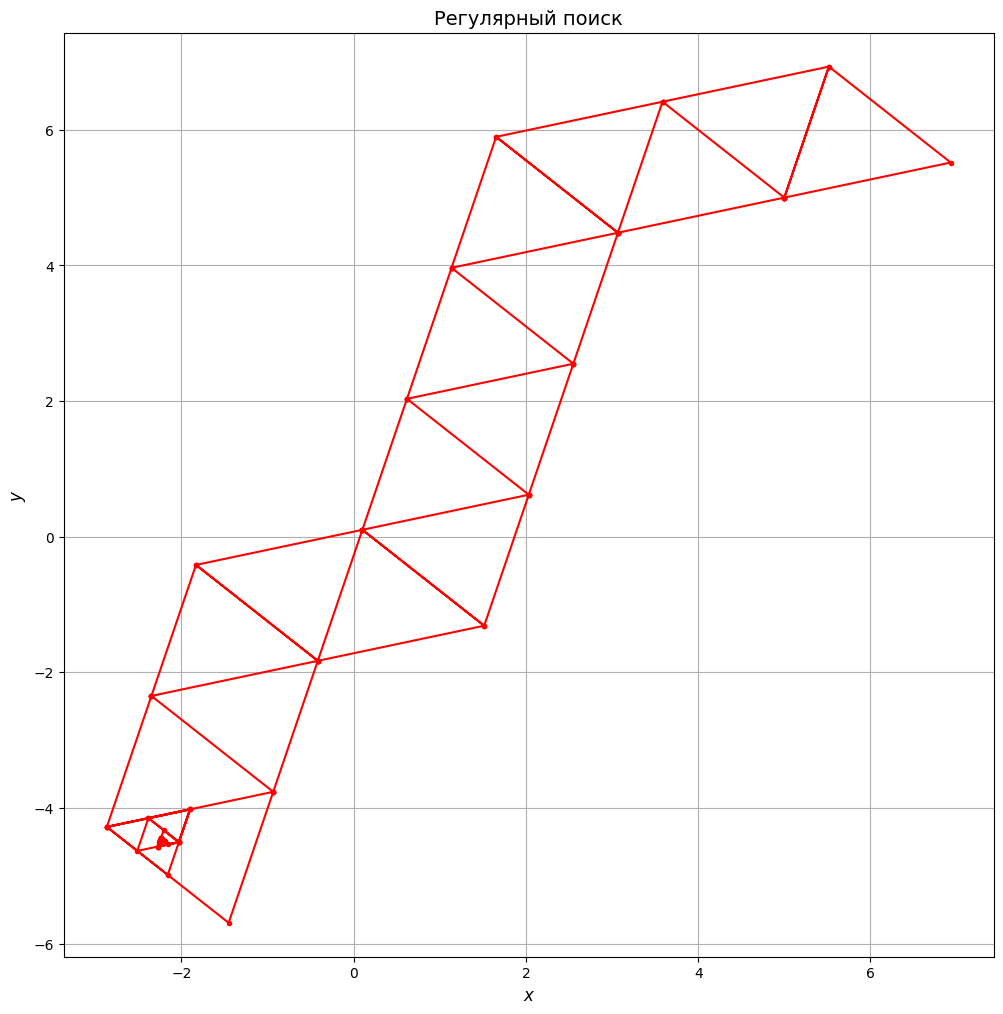

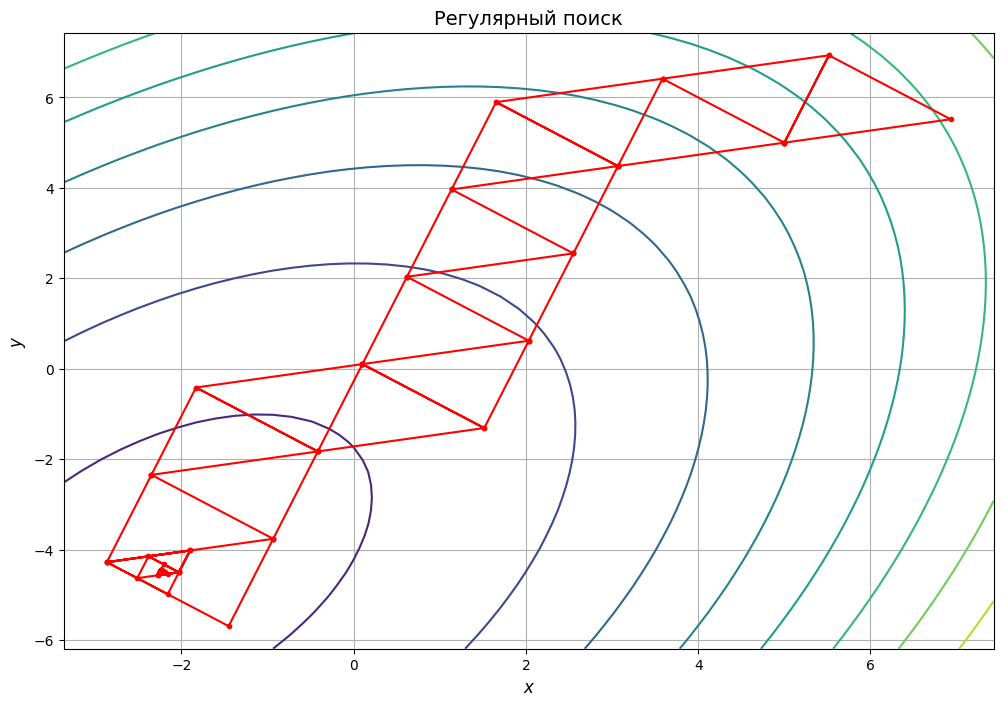

In [ ]:
import numpy as np
import math

alpha = 133
def Rosenbrock(X):
    return alpha * (X[0]**2 - X[1])**2 + (X[0] - 1)**2

def f1(X):
    return 6*X[0]**2 - 4* X[0] * X[1] + 3 * X[1]**2 + 4 * math.sqrt(5) * (X[0] +  2* X[1]) +22    

def f2(X):
    return 10*X[0]**2 - 4* X[0] * X[1] + 7 * X[1]**2 - 4 * math.sqrt(5) * (5*X[0] -X[1]) - 16    

X0 = np.array([5, -5])
foo = f1
eps = 0.001
x_min, xk,  n_f, n_d, levels_mass = lab7_methods(foo, eps, X0, 1)
print('Аргумент, x_min = [', x_min[0],', ',x_min[1],']')
print('Значение, f(x_min) = ',foo(x_min))
print('Кол-во итераций, iter = ',n_d)
print('Кол-во вызовов функции, value = ', n_f)



draw_plot(xk, foo, levels_mass,1)


#print(levels_mass)
# draw_all(x0, x_min, xk, 0, foo, 30, -20)
# draw_plot(xk, foo, levels_mass)
#print(xk)
draw_counterplot(x_min, xk, 1, foo)
#draw_all(x0, x_min, xk, w_norm, 0, foo, 45, 170)

#print(xk)
# alpha = 200
# foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2

# print_res(foo, x0, 2)


***Метод Недлера-Мида (встроенный)***

In [7]:
import numpy as np
import math # Для sqrt()
import scipy.optimize as opt


alpha = 133
def Rosenbrock(X):
    return alpha * (X[0]**2 - X[1])**2 + (X[0] - 1)**2

def f1(X):
    return 6*X[0]**2 - 4* X[0] * X[1] + 3 * X[1]**2 + 4 * math.sqrt(5) * (X[0] +  2* X[1]) +22    

def f2(X):
    return 10*X[0]**2 - 4* X[0] * X[1] + 7 * X[1]**2 - 4 * math.sqrt(5) * (5*X[0] -X[1]) - 16    

# Начальная точка поиска минимума функции
X0 = np.array([2, -2])
xtol = 1.0e-3 # Точность поиска экстремума
# Находим минимум функции
res = opt.minimize(Rosenbrock, X0, method = 'Nelder-Mead', options = {'xtol': xtol, 'disp': True})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 76
         Function evaluations: 142
 final_simplex: (array([[1.00000421, 1.00001027],
       [0.9999666 , 0.99993352],
       [1.0000363 , 1.00007176]]), array([4.68904622e-10, 1.13021621e-09, 1.40946921e-09]))
           fun: 4.689046221397607e-10
       message: 'Optimization terminated successfully.'
          nfev: 142
           nit: 76
        status: 0
       success: True
             x: array([1.00000421, 1.00001027])


C:\Users\griho\AppData\Local\Temp\ipykernel_59972\1648234684.py:20: OptimizeWarning: Unknown solver options: xtol
  res = opt.minimize(Rosenbrock, X0, method = 'Nelder-Mead', options = {'xtol': xtol, 'disp': True})


In [69]:
from cmath import sqrt
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

def Rosenbrock(X):
    return alpha * (X[0]**2 - X[1])**2 + (X[0] - 1)**2

def f1(X):
    return 6*X[0]**2 - 4* X[0] * X[1] + 3 * X[1]**2 + 4 * math.sqrt(5) * (X[0] +  2* X[1]) +22    

def f2(X):
    return 10*X[0]**2 - 4* X[0] * X[1] + 7 * X[1]**2 - 4 * math.sqrt(5) * (5*X[0] -X[1]) - 16 

f = f1
L = 2
n = 2
delta = 1/2
iter = value = 0

X0 = np.array([5, 5])
points = np.array([[]])
#начальный симплекс
simplex = np.array([X0, [X0[0] + L * (np.sqrt(n+1)+n-1)/(n*np.sqrt(2)), X0[1] + L * (np.sqrt(n+1)-1)/(n*np.sqrt(2))],
[X0[1] + L * (np.sqrt(n+1)+n-1)/(n*np.sqrt(2)), X0[1] + L * (np.sqrt(n+1)+n-1)/(n*np.sqrt(2))]])

simplex_fun = np.array([f(simplex[0]),f(simplex[1]),f(simplex[2])])
alpha = 30

#строит симплекс
def Simplex(x):
    simplex[0] = x
    simplex[1] = [x[0] + L * (np.sqrt(n+1)+n-1)/(n*np.sqrt(2)), x[1] + L * (np.sqrt(n+1)-1)/(n*np.sqrt(2))]
    simplex[2] = [x[1] + L * (np.sqrt(n+1)+n-1)/(n*np.sqrt(2)), x[1] + L * (np.sqrt(n+1)+n-1)/(n*np.sqrt(2))]
    print(simplex)
    return simplex

values = list(map(f,simplex))

np.sort(values)

plt.show()

C:\Users\griho\AppData\Local\Temp\ipykernel_51640\2649514438.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  x_simplex[1] = np.array([x_simplex[0][0] + L * (sqrt(n+1)+n-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)-1)/(n*sqrt(2))])
C:\Users\griho\AppData\Local\Temp\ipykernel_51640\2649514438.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  x_simplex[2] = np.array([x_simplex[0][0] + L * (sqrt(n+1)-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)+n-1)/(n*sqrt(2))])


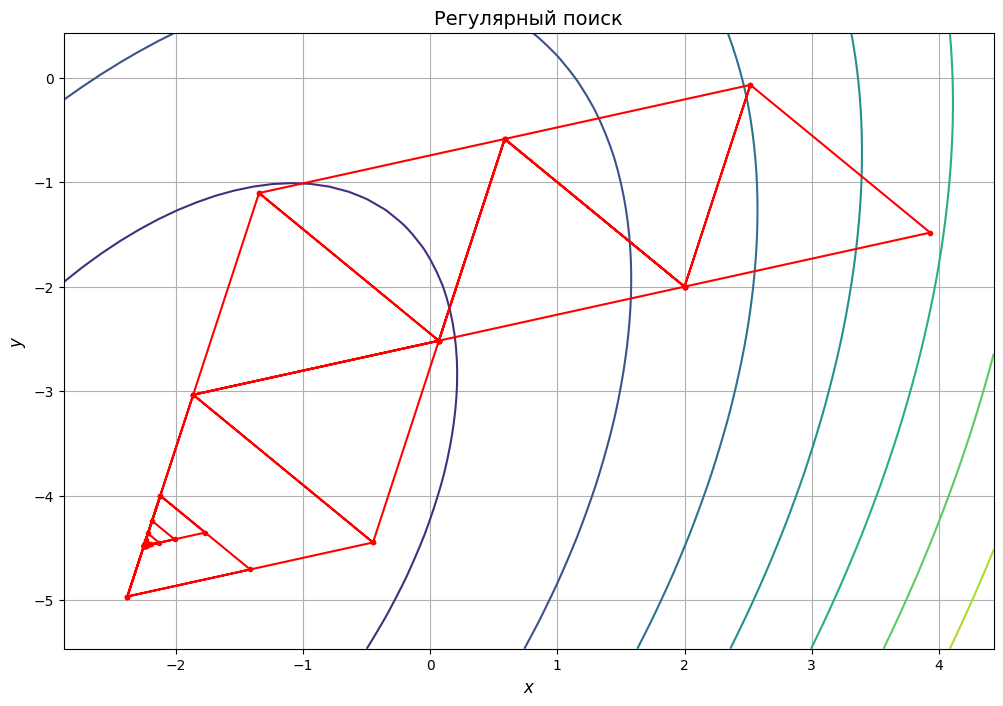

In [76]:
import numpy as np
import math

alpha = 75
def foo(X):
    return 6*X[0]**2 - 4* X[0] * X[1] + 3 * X[1]**2 + 4 * math.sqrt(5) * (X[0] +  2* X[1]) +22    

def f2(X):
    return 10*X[0]**2 - 4* X[0] * X[1] + 7 * X[1]**2 - 4 * math.sqrt(5) * (5*X[0] -X[1]) - 16 

x0 = np.array([2, -2])
x_min, xk,  n_f, n_d, levels_mass = lab7_methods(foo, 0.001, x0, 1)

draw_counterplot(x_min, xk, 1, foo)
# draw_plot(xk, foo, levels_mass, 1)